In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from copy import copy

Question 2 : Write a function that takes n as its parameter and generates an nxn matrix, whose entries are random numbers uniformly distributed in [-1,1].

In [2]:
def generate (unif,n):
    mat=[[0 for x in range (n)] for y in range (n)] #initalizes all entries to 0
    for i in range(n):        
        for j in range(n):
            if unif:
                mat[i][j]= np.random.uniform(-1,1) # distributes uniformly between [-1,1)
            #else
                #mat[i][j]= 
    return mat

In [3]:
def generateunif(n):
    # nxn matrix generation function
    # uniformly distibuted entries
    mat=[[0 for x in range (n)] for y in range (n)] #initalizes all entries to 0
    for i in range(n):        
        for j in range(n):
            mat[i][j]= np.random.uniform(-1,1) # distributes uniformly between [-1,1)
    return mat

In [4]:
def generatenorm(n):
    #nxn matrix
    # normally distributed entries
    mat=[[0 for x in range (n)] for y in range (n)] #initalizes all entries to 0
    mu=1 #set parameters for normal distribution
    sigma=0.1
    for i in range(n):
        for j in range (n):        
            mat[i][j]=np.random.normal(mu, sigma) # distributes normally
    return mat

Question 3 : Implement Gaussian elimination with partial pivoting, and test it on a number of cases to be sure of its correctness.

In [5]:
def gaussian(mat,n):
# gaussian elimination on nxn matrix
    for pvtr in range(n): # stands for pivot row
        pivot = mat[pvtr][pvtr]
        for tgr in range (pvtr+1,n): #stands for target row
            if mat[tgr][pvtr] != 0:
                ratio=mat[tgr][pvtr]/pivot #finds by how much we need to scale the pivot to make entry =0 
                                            #kpivot=entry so k =entry/pivot
                #print ratio #debug
                rowred(mat,tgr,pvtr,ratio,n) # then reduces the whole row by the ratio
    return mat # returns upper triangular matrix #debug

In [6]:
def rowred(mat, tgr, pvtr, ratio, n):
    # perfoms row reduction on one row given a matrix, a row number, a starting point column and a reduction ratio
    for k in range (pvtr,n): #for the entire row, starting right under the pivot
        mat[tgr][k]=mat[tgr][k]-mat[pvtr][k]*ratio # reduces one row with a certain ratio
        #print k # debug

Question 4 : Plot the growth factor against the matrix size, in logathmic scale, where the matrices are generated as in (a). The samples of matrices should be large enough to be a good representative of random matrices with n ranging between 10 and 1000. In patricular for each n, one should experiment on a generous number of matrices. From the experimental plot, estimate the power alpha in the assument dependence g ~ cn^alpha where g is the growth factor, n is the matrix size and c is a constant. Compare this with the worst case scenario g ~ 2^n.

In [7]:
def growth(mat, upp, n):
    #given two matrices calculates the growth factor
    maxu=maxabs(upp,n)
    maxm=maxabs(mat,n)
    gr=maxu/maxm
    return gr

In [8]:
def maxabs(mat, n):
    #finds the maximum of the absolute values of the entries in a given matrix
    m=0 #initializing
    for i in range (n):
        for j in range (n): #double for loop to span matrix
            if abs(mat[i][j])>m:
                m=abs(mat[i][j]) #replace if bigger
    return m

In [9]:
def compute (nlist, unif):
    #generates matrices with uniformly distributed entries, performes gaussian elimination and returns growth factors
    growthlist=[]
    for n in nlist:
        grft=findavgf(n,unif)
        growthlist.append(grft)
    return growthlist

In [10]:
def findavgf(n, unif):
    #computes average growth factors for 10 matrices of given size then returns average
    sum=0
    it=25
    for i in range (it):#print "finding grft" #debug
        sum=+findgrowthfactor(unif, n)
    av=sum/it
    return av

In [11]:
def findgrowthfactor (unif, n):
    # generates matrices with either uniformly or normally distributed entries
    # then performs gaussian eliination then computes growth factor (average over 10 trials)
    if unif:
        matrix=generateunif(n)
    else:
        matrix=generatenorm(n)
    #matrix=generate(unif, n)
    upper=[row[:]for row in matrix] #makes a copy of the original matrix
    upper=gaussian(upper,n) # performs gaussian elimination#prf(matrix,n) #debug#prf(upper,n) #debug
    grft=growth(matrix,upper,n)#print "in findgrowthfactor"#print grft #debug
    return grft

In [12]:
def prf2D(mat, n): #debug function
# print function for nxn matrix
    for i in range (n):
        for j in range (n):
            print mat[i][j]

In [13]:
def prf1D(mat, n): #debug function
    #print function for 1D array length n
    for i in range(n):
        print mat[i]

In [14]:
nlist = [10, 100, 200, 500, 700, 900]
unif=True

#fig = plt.figure(figsize=(10,10))
#ax1 = fig.add_subplot(211)

#ax1.plot(nlist,np.log(compute(nlist, unif)),label='growth factor') # everything is done in the compute function

#ax1.set_title('matrix size vs growth factor - uniform')
#ax1.xaxis.set_label_coords(.5,.06)
#ax1.set_xlabel('matrix size')
#ax1.set_ylabel('growth factor')
#ax1.legend(loc="upper center")
#plt.show()

From the experimental plot, we can see that the growth factor function can be approximated by g=cn^a and that here a~1/2, which is a lot less than the worst case scenario value of g~2^n

Question 5 : Now we study the probability distribution of the growth factor for a fixed n. Fix n and generate an abondant number of random matrices as in (1) to measure their growth factors. Then by subdividing the value space of the growth factor into small subintervals of equal length and by counting the number of matrices with growth factor lying in each of those subintervals, produce and approximation of the probabilty density function of the growth factor (the usual histogram technique). Plot it against the growth factor value, with the vertical axis in logarithmic scale. Make a conjecture on how the probability density decays as the growth factor becomes large. Note that the number of matrices and the length of the subintervals should  be so that most of the subintervals individually contain a large number of matrices and that there are enough subintervals to gove a meaningfull approximation of the probability density function. Repeat the experiment for several values of n, say n=20, n=40, n=80.

In [15]:
def compute2 (n, unif, subint):
    #given a matrix size, generates 100 matrices, calculates their growth factors 
    #and gives back their density ditribution
    gflist=[] #initializing
    proba=[0 for x in range(subint)] #initializing
    for i in range (100): #calcutates growth factors for 100 nxn matrices
        gf=findgrowthfactor(unif, n)
        gflist.append(gf) #print gf #debug
    proba=density(proba, gflist, subint, n) # calculates density
    return proba

In [16]:
def density (proba, gflist, subint,n):
    # takes in a list of values gives back their density of distribution 
    proba=count(proba, gflist, subint,n)       #print "subint is = "#print subint #debug
    for i in range (subint):      #print "original value ="#print proba[i] #debug
        proba[i]=float(proba[i])/float(subint)*100     #print "Im in there"#print proba[i] #debug#prf1D(proba, subint)#n=0#print "all the probabilities are : " # debug#for i in range(subint):#print proba [i] #debug
    return proba

In [17]:
def count (proba, gflist, subint,n):
    # given a list of values and a number a intervals, counts how many alues are in each intervals
    for i in gflist: # for each matrix
        interval=0# initializing         #print "Im there"#print "gflist number ="#print i #debug
        for k in range (subint-1): # for every subinterval
            if i>k*(pow(2,n)/subint): # if the growthfactor is not in the kth interval     #print "yes" #debug
                interval=interval+1 # check if it is in the next one     #print interval #debug
            else : #if it is in this interval
                break  #then we dont need to check for the others
        proba[interval]= proba[interval]+1 #increment number of gf in this subint     #print subint#print 'proba is'#print proba[subint] # debug
    return proba

In [18]:
n = 10 
unif= True
subint=100 #choosing how many subintervals I want/need
valuelist=[x for x in range(subint)]
#subint = int(pow(2,n)/n)+1        #print "subint is"#print subint #debug
#so here I wanted to have everything expressed according to the matrix size so my program would work for any n
#this way I could just change the n value and have it give back the density
#but I couldn't find an expression that made sense ie that gave me subintervals small enough to be meaningful
#and big enough so that not too many were empty

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)

ax1.hist(compute2(n, unif, subint),valuelist,label='density') #so this doesn't work as I'd like it to, Im probablity using it the wrong way

ax1.set_title('growth factor vs distribution')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('growth factor (log)')
ax1.set_ylabel('probability in %')
ax1.legend(loc="upper center")
plt.show()

As the growth factor becomes larger, the density seems to decrease a lot. My histograms don't seem to be accurate but from printing out the 'proba' list and looking at the percentage of growth factor present in each subintervals, I observed that almost everytime, there are 505 to 70% of them present in the first 3 intervals (for n=10). For bigger matrices, most growth factors are in the first 10 subintervals.
Thus, very large growth factor are less likely to occur that smaller ones, but as the matrix size gets larger, the avergae growth factor value will increase.

Question 6 : Repeat the preceding 2 items for matrices whose entries are ranbom numbers with a normal distribution. Prick the parameters (mu and sigma) at your convenience.

hi


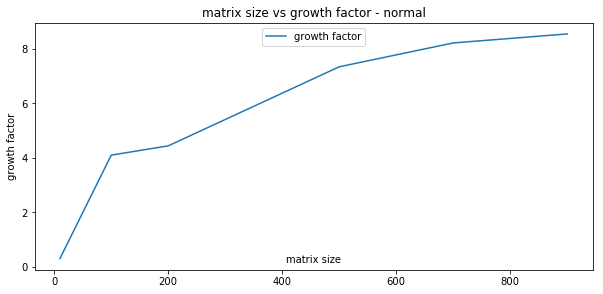

In [19]:
nlist = [10, 100, 200, 500, 700, 900]
unif=False

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)

print "hi"#debug
ax1.plot(nlist,np.log(compute(nlist, unif)),label='growth factor') # everything is done in the compute function

ax1.set_title('matrix size vs growth factor - normal')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('matrix size')
ax1.set_ylabel('growth factor')
ax1.legend(loc="upper center")
plt.show()

From the experimental plot, we can see that just as with the uniform distribution, the growth factor function can be approximated by g=cn^a and that here a~1/2. However, the constant c would differ.

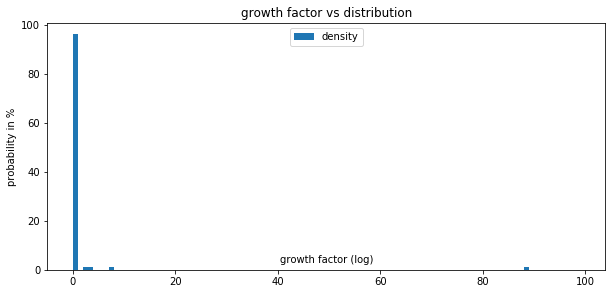

In [20]:
n = 10 
unif= False
subint=100 #choosing how many subintervals I want/need
valuelist=[x for x in range(subint)]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)

ax1.hist(compute2(n, unif, subint),valuelist,label='density') #eveything is done in the compute2 function for clarity

ax1.set_title('growth factor vs distribution')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('growth factor (log)')
ax1.set_ylabel('probability in %')
ax1.legend(loc="upper center")
plt.show()

We obeserve more of less the same behavior as with unifrmoly distributed matrix entries. However, this may be because of the error in my histogram code.